In [66]:
import pandas as pd
import numpy as np
import os
from os import walk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [67]:
# change to path for 'Saved Models'
ensemble_path = os.path.normpath('./Saved Models/')

### Load Ensembles

In [68]:
n = 10

reconstructed_ensemble1 = [0]*n
reconstructed_ensemble2 = [0]*n
reconstructed_ensemble3 = [0]*n

for k in range(n):
    reconstructed_ensemble1[k] = keras.models.load_model(os.path.join(ensemble_path , 'Ensemble1', f"Ensemble1_model{k}"))


for k in range(n):
    reconstructed_ensemble2[k] = keras.models.load_model(os.path.join(ensemble_path , 'Ensemble2', f"Ensemble2_model{k}"))


for k in range(n):
    reconstructed_ensemble3[k] = keras.models.load_model(os.path.join(ensemble_path , 'Ensemble3', f"Ensemble3_model{k}"))

### Function to predict an image

In [69]:
def classify(img_path,ensemble = 1):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array = img_array /255

    img_batch = np.expand_dims(img_array, axis=0)
    
    results = np.zeros( (1,7) ) 
    n = 10

    if ensemble == 1:
        for j in range(n):
            results = results + reconstructed_ensemble1[j].predict(img_batch)
    elif ensemble == 2:
        for j in range(n):
            results = results + reconstructed_ensemble2[j].predict(img_batch)
    else:
        for j in range(n):
            results = results + reconstructed_ensemble3[j].predict(img_batch)

    # Performing Max Voting
    results = np.argmax(results,axis = 1)

    return results

## Reading Test Data

In [70]:
# Taking Images frome Test Directory
from glob import glob
label_map = {
        'ak': 0,
        'bcc': 1,
        'bkl': 2,
        'df': 3,
        'mel': 4,
        'nv': 5,
        'vasc': 6
    }
y_label_subset = [label_map[label.split('/')[1]] for label in glob('test/*/*')]
y_label_subset_classes = [label.split('/')[1] for label in glob('test/*/*')]
test_img_path_subset = [img_file for img_file in glob('test/*/*')]
test_img_path_subset_names = [img_file.split('/')[-1] for img_file in glob('test/*/*')]

In [71]:
sample_df = pd.DataFrame({'image_name':test_img_path_subset_names, 'diagnosis': y_label_subset_classes, 'labels': y_label_subset})
sample_df

image_name diagnosis  labels
0    ISIC_0030870.jpg        df       3
1    ISIC_0028346.jpg        df       3
2    ISIC_0031429.jpg        df       3
3    ISIC_0031372.jpg        df       3
4    ISIC_0024386.jpg        df       3
..                ...       ...     ...
695  ISIC_0024410.jpg       mel       4
696  ISIC_0024767.jpg       mel       4
697  ISIC_0024940.jpg       mel       4
698  ISIC_0024571.jpg       mel       4
699  ISIC_0025121.jpg       mel       4

[700 rows x 3 columns]

In [72]:
%%time
y_pred1_sub = []
for x in test_img_path_subset:
    y_pred1_sub.extend(classify(x,1))
print("ensemble 1")
print('Confusion Matrix')
print(confusion_matrix(y_label_subset,y_pred1_sub))
print('Classification Report')
target_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(classification_report(y_label_subset,y_pred1_sub,target_names=target_names))

2022-04-06 00:47:02.930564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:47:03.110046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:47:03.227524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:47:03.328269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:47:03.423671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:47:03.524778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:47:03.612536: I tensorflow/core/grappler/optimizers/cust

ensemble 1
Confusion Matrix
[[ 69   1   2   0   0  28   0]
 [  0  84   2   0   0  14   0]
 [  0   2  40   0   0  58   0]
 [  1   5   0  54   0  40   0]
 [  0   0   1   0  36  63   0]
 [  0   0   0   0   0 100   0]
 [  0   9   0   0   1  15  75]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.99      0.69      0.81       100
         bcc       0.83      0.84      0.84       100
         bkl       0.89      0.40      0.55       100
          df       1.00      0.54      0.70       100
         mel       0.97      0.36      0.53       100
          nv       0.31      1.00      0.48       100
        vasc       1.00      0.75      0.86       100

    accuracy                           0.65       700
   macro avg       0.86      0.65      0.68       700
weighted avg       0.86      0.65      0.68       700

CPU times: user 3min 19s, sys: 34.7 s, total: 3min 54s
Wall time: 3min 41s


In [73]:
%%time
y_pred2_sub = []
for x in test_img_path_subset:
    y_pred2_sub.extend(classify(x,2))
print("ensemble 2")
print('Confusion Matrix')
print(confusion_matrix(y_label_subset,y_pred2_sub))
print('Classification Report')
target_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(classification_report(y_label_subset,y_pred2_sub,target_names=target_names))

2022-04-06 00:50:43.936855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:50:44.102892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:50:44.231847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:50:44.349433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:50:44.473158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:50:44.586338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:50:44.704372: I tensorflow/core/grappler/optimizers/cust

ensemble 2
Confusion Matrix
[[ 0  0 31 69  0  0  0]
 [ 0  0 27 73  0  0  0]
 [ 0  0 20 80  0  0  0]
 [ 0  0 30 70  0  0  0]
 [ 1  0 11 88  0  0  0]
 [ 0  0 24 76  0  0  0]
 [ 0  0 12 88  0  0  0]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00       100
         bcc       0.00      0.00      0.00       100
         bkl       0.13      0.20      0.16       100
          df       0.13      0.70      0.22       100
         mel       0.00      0.00      0.00       100
          nv       0.00      0.00      0.00       100
        vasc       0.00      0.00      0.00       100

    accuracy                           0.13       700
   macro avg       0.04      0.13      0.05       700
weighted avg       0.04      0.13      0.05       700

CPU times: user 3min 29s, sys: 37.7 s, total: 4min 7s
Wall time: 3min 53s


/Users/leoliang/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leoliang/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leoliang/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [74]:
%%time
y_pred3_sub = []
for x in test_img_path_subset:
  y_pred3_sub.extend(classify(x,3))
print("ensemble 3")
print('Confusion Matrix')
print(confusion_matrix(y_label_subset,y_pred3_sub))
print('Classification Report')
target_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(classification_report(y_label_subset,y_pred3_sub,target_names=target_names))

2022-04-06 00:54:37.896662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:54:38.093875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:54:38.212378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:54:38.317773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:54:38.420016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:54:39.326044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:54:39.432980: I tensorflow/core/grappler/optimizers/cust

ensemble 3
Confusion Matrix
[[99  0  0  0  0  1  0]
 [ 2 94  2  0  0  2  0]
 [ 4  1 76  1  5 13  0]
 [ 1  1  0 93  0  5  0]
 [ 2  1  1  0 77 19  0]
 [ 0  1  0  0  1 98  0]
 [ 1  9  0  0  1 10 79]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.91      0.99      0.95       100
         bcc       0.88      0.94      0.91       100
         bkl       0.96      0.76      0.85       100
          df       0.99      0.93      0.96       100
         mel       0.92      0.77      0.84       100
          nv       0.66      0.98      0.79       100
        vasc       1.00      0.79      0.88       100

    accuracy                           0.88       700
   macro avg       0.90      0.88      0.88       700
weighted avg       0.90      0.88      0.88       700

CPU times: user 3min 37s, sys: 40.4 s, total: 4min 17s
Wall time: 4min 4s


# Prediction result images samples

In [75]:
sample_df['predictions3'] = y_pred3_sub

In [76]:
ak_false3 = sample_df[(sample_df.diagnosis == 'ak') &
              (sample_df.labels != sample_df.predictions3)].reset_index()
ak_true3 = sample_df[(sample_df.diagnosis == 'ak') &
              (sample_df.labels == sample_df.predictions3)].reset_index()

bcc_false3 = sample_df[(sample_df.diagnosis == 'bcc') &
              (sample_df.labels != sample_df.predictions3)].reset_index()
bcc_true3 = sample_df[(sample_df.diagnosis == 'bcc') &
              (sample_df.labels == sample_df.predictions3)].reset_index()

bkl_false3 = sample_df[(sample_df.diagnosis == 'bkl') &
              (sample_df.labels != sample_df.predictions3)].reset_index()
bkl_true3 = sample_df[(sample_df.diagnosis == 'bkl') &
              (sample_df.labels == sample_df.predictions3)].reset_index()

df_false3 = sample_df[(sample_df.diagnosis == 'df') &
              (sample_df.labels != sample_df.predictions3)].reset_index()
df_true3 = sample_df[(sample_df.diagnosis == 'df') &
              (sample_df.labels == sample_df.predictions3)].reset_index()

mel_false3 = sample_df[(sample_df.diagnosis == 'mel') &
              (sample_df.labels != sample_df.predictions3)].reset_index()
mel_true3 = sample_df[(sample_df.diagnosis == 'mel') &
              (sample_df.labels == sample_df.predictions3)].reset_index()

nv_false3 = sample_df[(sample_df.diagnosis == 'nv') &
              (sample_df.labels != sample_df.predictions3)].reset_index()
nv_true3 = sample_df[(sample_df.diagnosis == 'nv') &
              (sample_df.labels == sample_df.predictions3)].reset_index()

vasc_false3 = sample_df[(sample_df.diagnosis == 'vasc') &
              (sample_df.labels != sample_df.predictions3)].reset_index()
vasc_true3 = sample_df[(sample_df.diagnosis == 'vasc') &
              (sample_df.labels == sample_df.predictions3)].reset_index()

incorrect predictions: AKIEC images (ensemble 3) sample


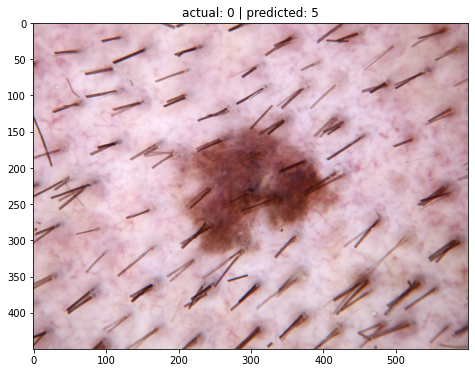

correct predictions: AKIEC images (ensemble 3) sample


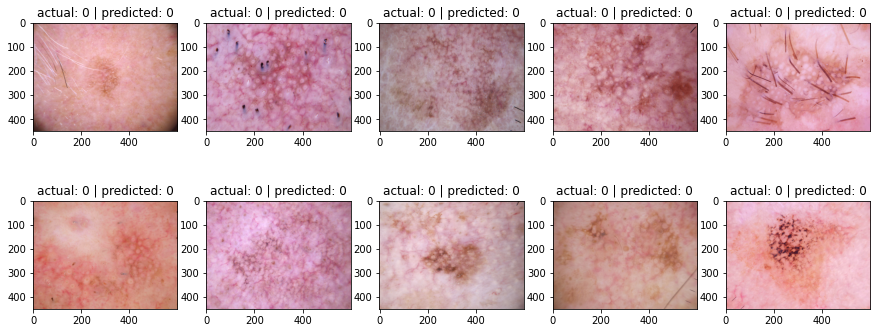

incorrect predictions: BCC images (ensemble 3) sample


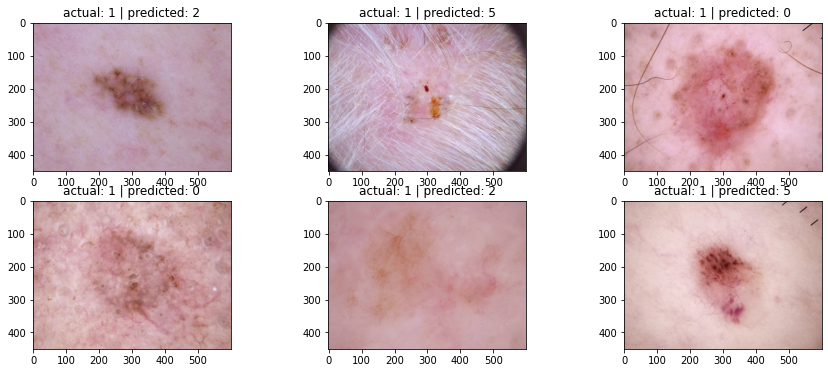

correct predictions: BCC images (ensemble 3) sample


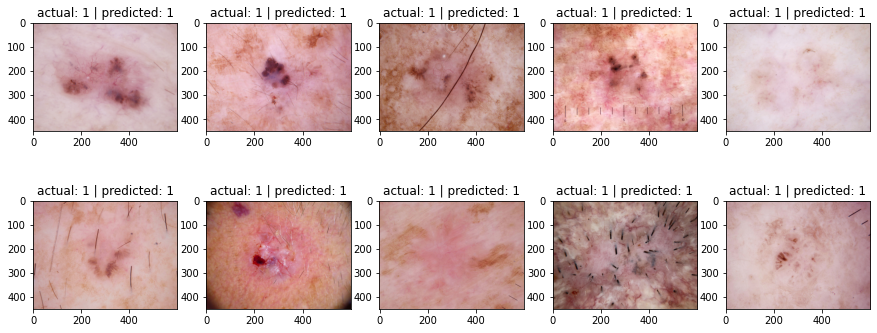

incorrect predictions: BKL images (ensemble 3) sample


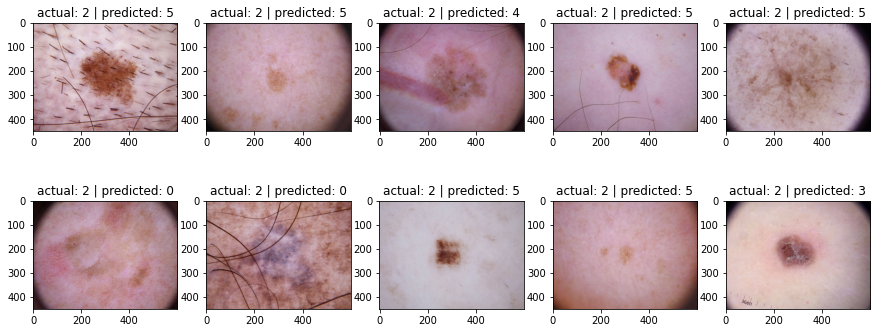

correct predictions: BKL images (ensemble 3) sample


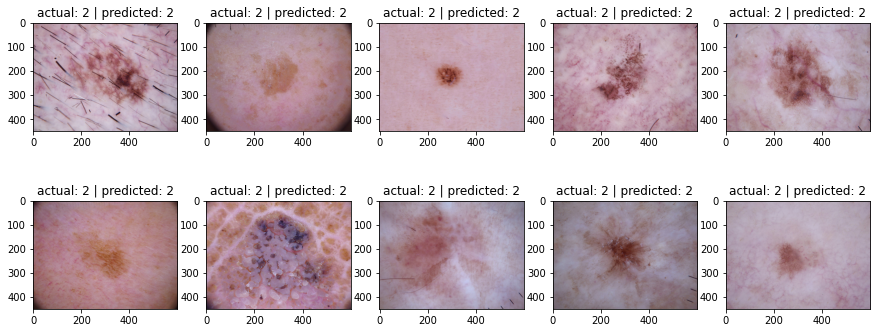

incorrect predictions: DF images (ensemble 3) sample


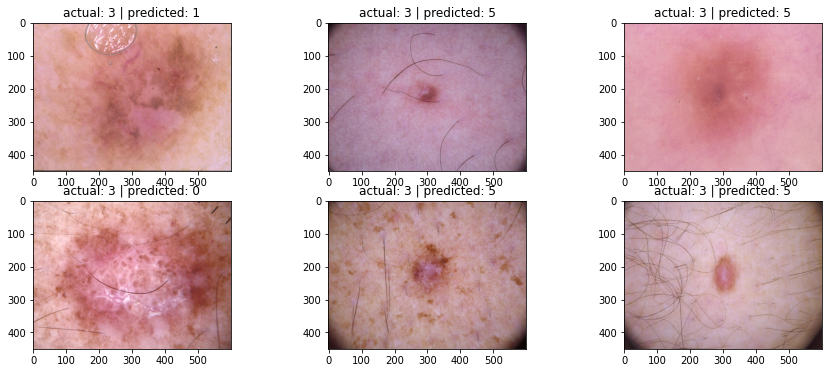

correct predictions: DF images (ensemble 3) sample


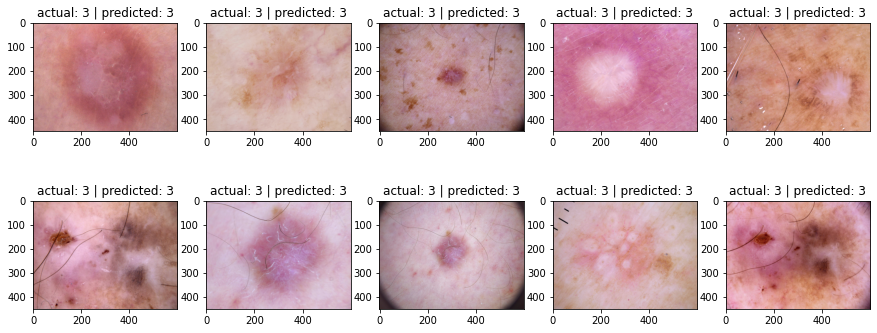

incorrect predictions: Melanoma images (ensemble 3) sample


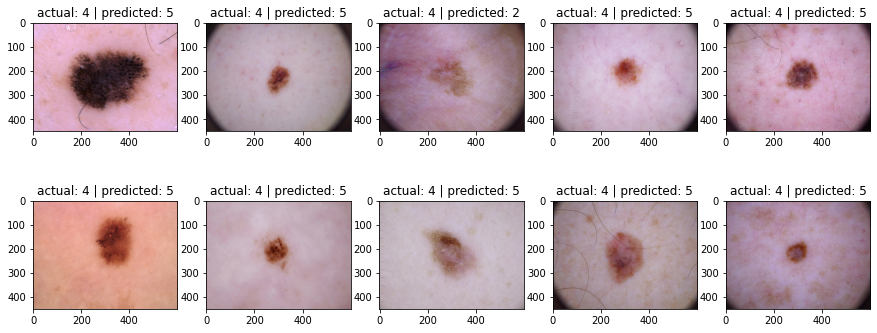

correct predictions: Melanoma images (ensemble 3) sample


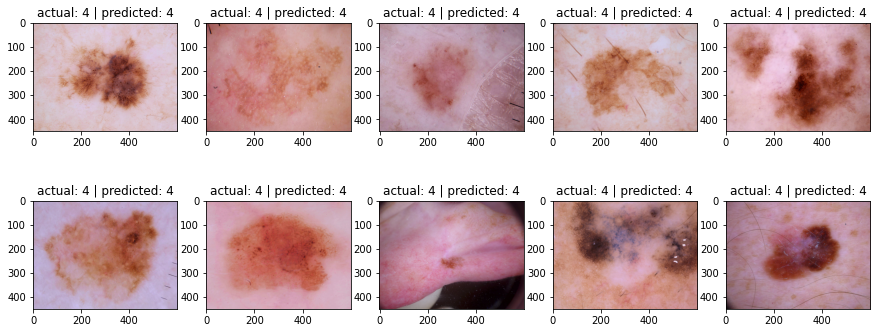

incorrect predictions: Nevus images (ensemble 3) sample


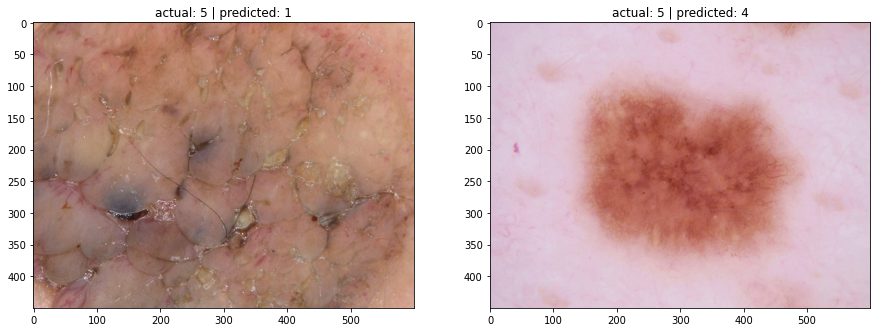

correct predictions: Nevus images (ensemble 3) sample


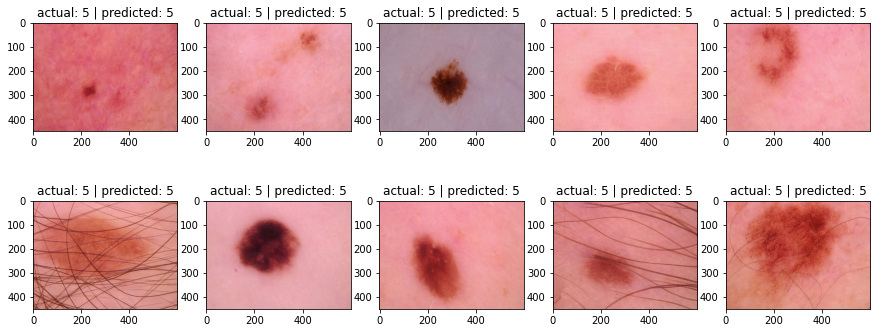

incorrect predictions: VASC images (ensemble 3) sample


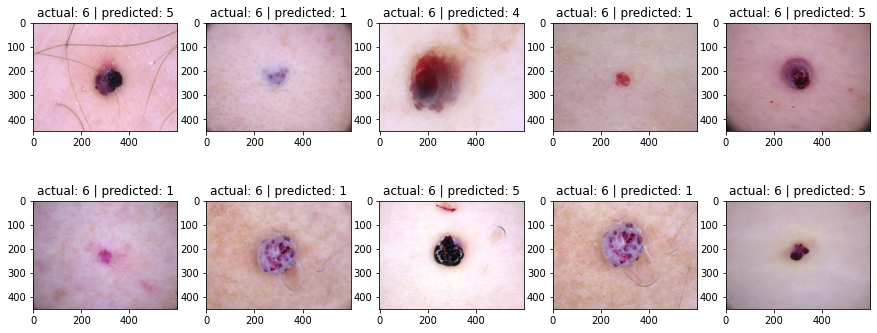

correct predictions: VASC images (ensemble 3) sample


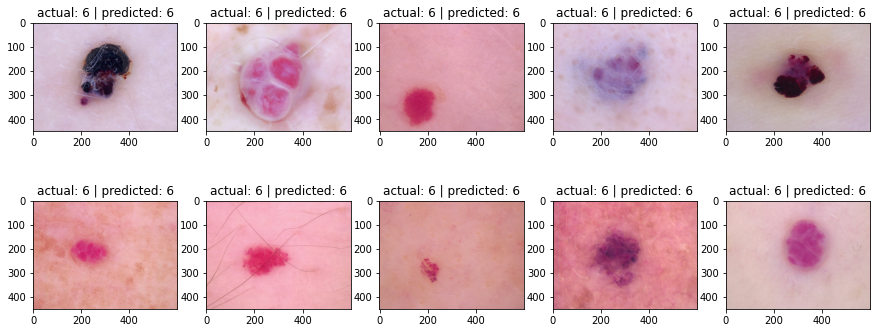

CPU times: user 10.1 s, sys: 995 ms, total: 11.1 s
Wall time: 6.74 s


In [113]:
%%time
print("incorrect predictions: AKIEC images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 1
rows = 1
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,ak_false3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(ak_false3.labels[i]) + " | predicted: " + str(ak_false3.predictions3[i])) 
    plt.imshow(img)
plt.show()

print("correct predictions: AKIEC images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,ak_true3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(ak_true3.labels[i]) + " | predicted: " + str(ak_true3.predictions3[i])) 
    plt.imshow(img)
plt.show()

###########

print("incorrect predictions: BCC images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 3
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,bcc_false3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(bcc_false3.labels[i]) + " | predicted: " + str(bcc_false3.predictions3[i])) 
    plt.imshow(img)
plt.show()

print("correct predictions: BCC images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,bcc_true3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(bcc_true3.labels[i]) + " | predicted: " + str(bcc_true3.predictions3[i])) 
    plt.imshow(img)
plt.show()

###########

print("incorrect predictions: BKL images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,bkl_false3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(bkl_false3.labels[i]) + " | predicted: " + str(bkl_false3.predictions3[i])) 
    plt.imshow(img)
plt.show()

print("correct predictions: BKL images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,bkl_true3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(bkl_true3.labels[i]) + " | predicted: " + str(bkl_true3.predictions3[i])) 
    plt.imshow(img)
plt.show()

###########

print("incorrect predictions: DF images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 3
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,df_false3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(df_false3.labels[i]) + " | predicted: " + str(df_false3.predictions3[i])) 
    plt.imshow(img)
plt.show()

print("correct predictions: DF images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,df_true3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(df_true3.labels[i]) + " | predicted: " + str(df_true3.predictions3[i])) 
    plt.imshow(img)
plt.show()

###########

print("incorrect predictions: Melanoma images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,mel_false3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(mel_false3.labels[i]) + " | predicted: " + str(mel_false3.predictions3[i])) 
    plt.imshow(img)
plt.show()

print("correct predictions: Melanoma images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,mel_true3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(mel_true3.labels[i]) + " | predicted: " + str(mel_true3.predictions3[i])) 
    plt.imshow(img)
plt.show()

###########

print("incorrect predictions: Nevus images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 2
rows = 1
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,nv_false3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(nv_false3.labels[i]) + " | predicted: " + str(nv_false3.predictions3[i])) 
    plt.imshow(img)
plt.show()

print("correct predictions: Nevus images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,nv_true3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(nv_true3.labels[i]) + " | predicted: " + str(nv_true3.predictions3[i])) 
    plt.imshow(img)
plt.show()

###########

print("incorrect predictions: VASC images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []
for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,vasc_false3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(vasc_false3.labels[i]) + " | predicted: " + str(vasc_false3.predictions3[i])) 
    plt.imshow(img)
plt.show()

print("correct predictions: VASC images (ensemble 3) sample")
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2
ax = []

for i in range(columns*rows):
    img = mpimg.imread(os.path.join(test_path,vasc_true3.image_name[i]))
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("actual: "+str(vasc_true3.labels[i]) + " | predicted: " + str(vasc_true3.predictions3[i])) 
    plt.imshow(img)
plt.show()

###########